In [ ]:
import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import norm
from scipy.integrate import quad
from scipy.spatial import distance

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving concrete.csv to concrete.csv


In [ ]:
data =  pd.read_csv('concrete.csv')
data_original = data.copy()

In [ ]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [ ]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Below shows how to view the cardinality and dimensionality size of the data

In [ ]:
data.shape

# number 0 represent the rows and 1 is for columns
print('data has a cardinality size {}'.format(data.shape[0]) + 
      ' and dimensionality size {}'.format(data.shape[1]))

data has a cardinality size 1030 and dimensionality size 9


Checking the columns have the correct classification of data type. 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


## Data Cleaning
Before starting, we need to check the data for any missing values and outliers.

In [ ]:
data.isna().sum()


cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

## As you can see, there is no NAN (not a number) in the columns.


In [ ]:
strength_max = data.strength.max()
strength_min = data.strength.min()
print("max:",strength_max)
print("min:",strength_min)

max: 82.6
min: 2.33


## Outliers
Using histograms and boxplots we can identify any ouliers in the data set.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


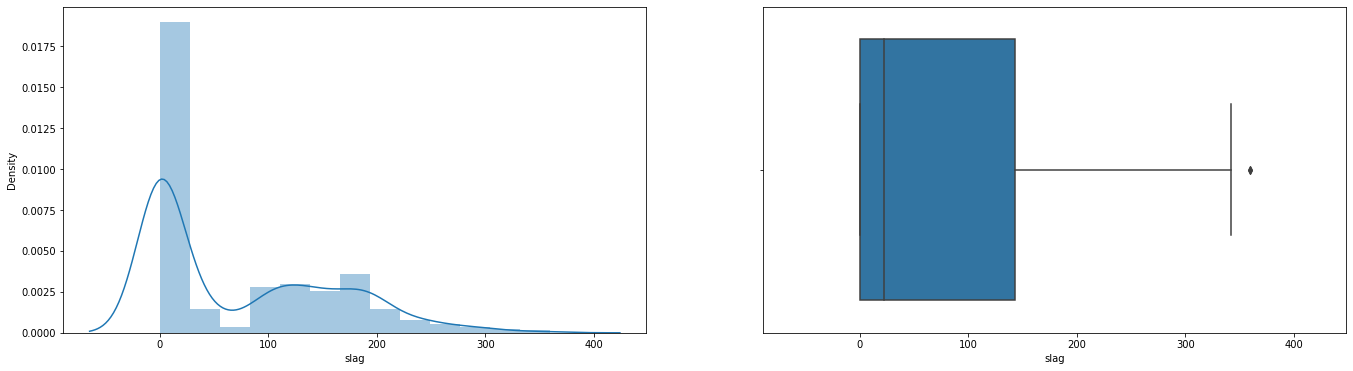

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(23, 6), sharex=True)
sns.distplot(data['slag'], ax = axes[0])
sns.boxplot(data['slag'], ax = axes[1])

As we can see, the values above 350 in the slag are outliers. To clean the data we should remove all records of data past this point.




In [ ]:
data[data['slag'] > 350]


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


Removing all entries that are above 350.


In [ ]:
data = data.drop(data[data['slag'] > 350].index)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


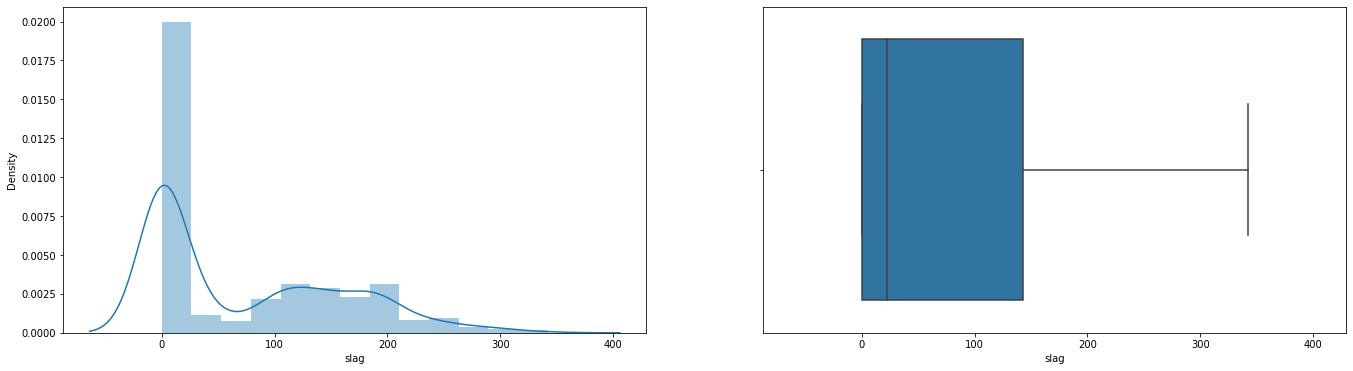

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(23, 6), sharex=True)
sns.distplot(data['slag'], ax = axes[0])
sns.boxplot(data['slag'], ax = axes[1])

And now the outliers in water

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


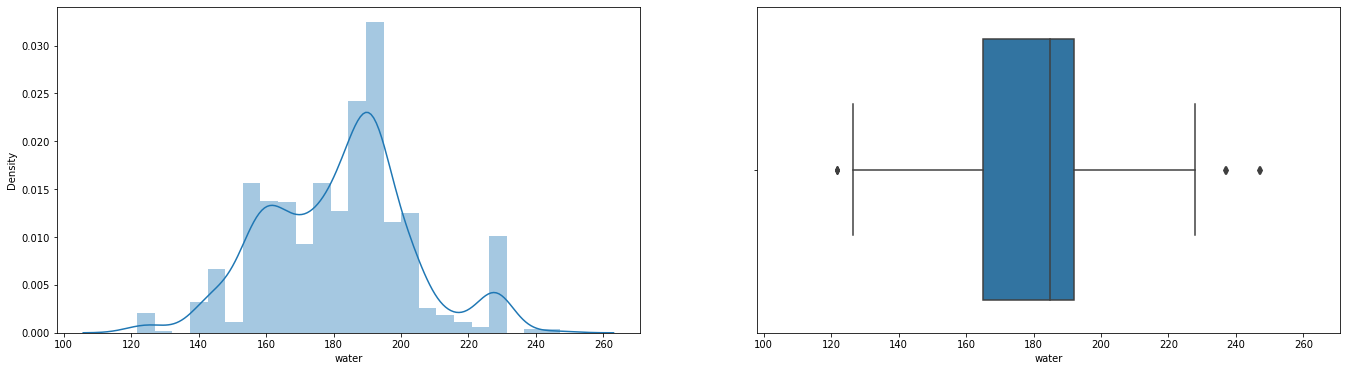

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(23, 6), sharex=True)
sns.distplot(data['water'], ax = axes[0])
sns.boxplot(data['water'], ax = axes[1])

Here the outliers are before 122 and after 230.

In [ ]:
data[(data['water'] < 122) | (data['water'] > 230)] 

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
740,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
826,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82


So once again, we drop those values from the column.

In [ ]:
data = data.drop(data[(data['water'] < 122) | (data['water'] > 230)].index)


Further examples of cleaning; superplastic.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


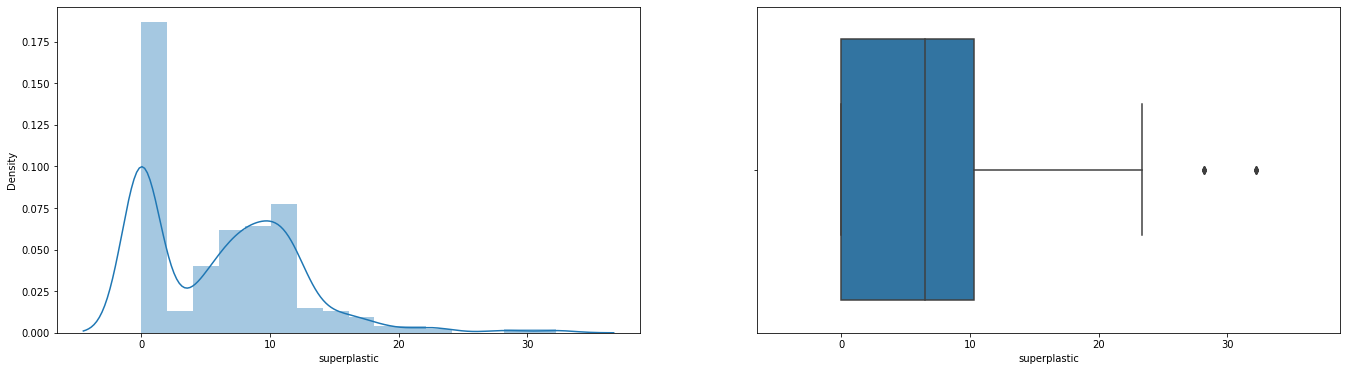

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(23, 6), sharex=True)
sns.distplot(data['superplastic'], ax = axes[0])
sns.boxplot(data['superplastic'], ax = axes[1])

In [ ]:
data = data.drop(data[data['superplastic'] > 25].index)
data[data['superplastic'] > 25]


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


cleaning fineagg

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


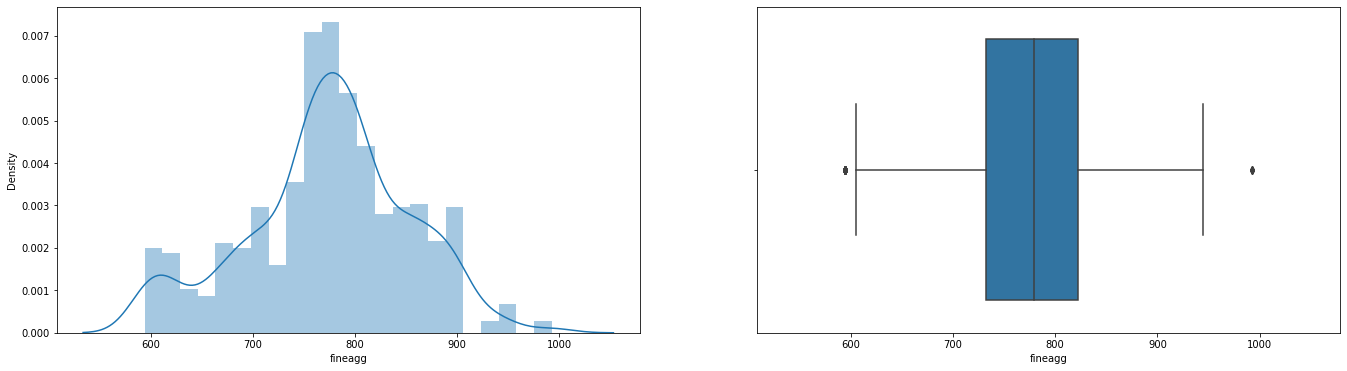

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(23, 6), sharex=True)
sns.distplot(data['fineagg'], ax = axes[0])
sns.boxplot(data['fineagg'], ax = axes[1])

In [ ]:
data[(data['fineagg'] < 600) | (data['fineagg'] > 950)]


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
13,237.5,237.5,0.0,228.0,0.0,932.0,594.0,7,26.26
16,237.5,237.5,0.0,228.0,0.0,932.0,594.0,28,30.08
31,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
99,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180,36.25
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.50
142,332.5,142.5,0.0,228.0,0.0,932.0,594.0,90,37.72
149,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270,41.15
241,427.5,47.5,0.0,228.0,0.0,932.0,594.0,90,41.54


In [ ]:
data = data.drop(data[(data['fineagg'] < 600) | (data['fineagg'] > 950)].index)

Cleaning age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


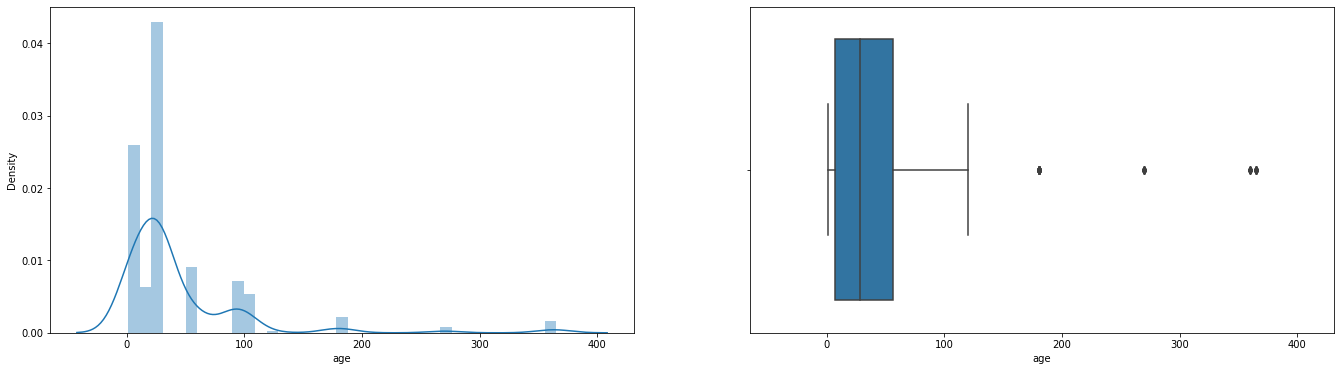

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(23, 6), sharex=True)
sns.distplot(data['age'], ax = axes[0])
sns.boxplot(data['age'], ax = axes[1])

In [ ]:
data[data['age'] > 150]


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180,53.10
133,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08
144,302.0,0.0,0.0,203.0,0.0,974.0,817.0,180,26.74
152,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.59
157,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
159,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,55.26
198,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365,52.91
199,277.0,0.0,0.0,191.0,0.0,968.0,856.0,180,32.33
207,190.0,190.0,0.0,228.0,0.0,932.0,670.0,180,46.93


In [ ]:
data = data.drop(data[data['age'] > 150].index)


## Heatmaps
Heatmaps can also be created. These help with visualizing patterns, and potential corralations within the data set.
https://seaborn.pydata.org/generated/seaborn.heatmap.html

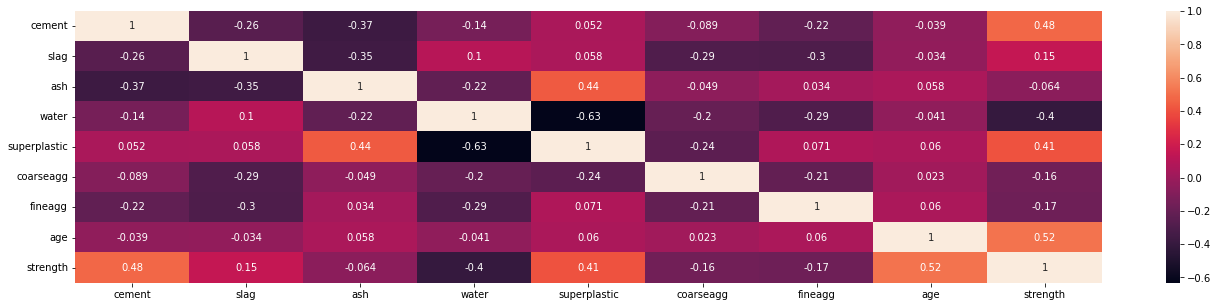

In [ ]:
plt.figure(figsize=(23,5))
sns.heatmap(data=data.corr(), annot=True);

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.258238,-0.369470,-0.140103,0.052218,-0.089384,-0.219985,-0.039477,0.483070
slag,-0.258238,1.000000,-0.352682,0.101954,0.057824,-0.288691,-0.299891,-0.034036,0.153368
ash,-0.369470,-0.352682,1.000000,-0.221016,0.438819,-0.048690,0.033982,0.057929,-0.064262
water,-0.140103,0.101954,-0.221016,1.000000,-0.632338,-0.199623,-0.288861,-0.041290,-0.397762
superplastic,0.052218,0.057824,0.438819,-0.632338,1.000000,-0.238847,0.070705,0.059866,0.408343
coarseagg,-0.089384,-0.288691,-0.048690,-0.199623,-0.238847,1.000000,-0.212737,0.023272,-0.159350
fineagg,-0.219985,-0.299891,0.033982,-0.288861,0.070705,-0.212737,1.000000,0.060164,-0.171411
age,-0.039477,-0.034036,0.057929,-0.041290,0.059866,0.023272,0.060164,1.000000,0.519314
strength,0.483070,0.153368,-0.064262,-0.397762,0.408343,-0.159350,-0.171411,0.519314,1.000000


## PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# initializing standard scaler, to be used for data scaling
scaler = StandardScaler()     

In [ ]:

drop_data = data.copy()
output_data = drop_data.loc[:, ['strength']]
drop_data = drop_data.drop(columns=['strength'])

# Scaling PCA
drop_data_scaled = drop_data.copy()
drop_data_scaled[drop_data_scaled.columns] = scaler.fit_transform(drop_data_scaled)

In [ ]:
# n=1 as we only want to select one component
pca = PCA(n_components=1)

#selecting 3 attributes to get a combination
a_dict = dict()   # dictionary to hold the variance of group of attributes        dict[attributes-name] = 1st PCA comp

# Three attribute group
for i in range (len(drop_data_scaled.columns) - 2):
    for j in range (i+1, len(drop_data_scaled.columns) - 1):
        for k in range (j+1, len(drop_data_scaled.columns) - 0):
            input_cols = [drop_data_scaled.columns[i], drop_data_scaled.columns[j], drop_data_scaled.columns[k]]
            col_str = "" + drop_data_scaled.columns[i] + "," + drop_data_scaled.columns[j] + "," + drop_data_scaled.columns[k]
            pca_strength = pca.fit_transform(drop_data_scaled[input_cols]) # applying PCA
            var = np.round(pca.explained_variance_ratio_, decimals=3) * 100 # variance on the first component
            print(col_str,  "=" , var)
            a_dict[col_str] = var



cement,slag,ash = [46.6]
cement,slag,water = [44.8]
cement,slag,superplastic = [41.9]
cement,slag,coarseagg = [44.9]
cement,slag,fineagg = [43.5]
cement,slag,age = [41.9]
cement,ash,water = [46.]
cement,ash,superplastic = [51.6]
cement,ash,coarseagg = [45.7]
cement,ash,fineagg = [48.2]
cement,ash,age = [46.1]
cement,water,superplastic = [55.3]
cement,water,coarseagg = [40.3]
cement,water,fineagg = [43.5]
cement,water,age = [38.]
cement,superplastic,coarseagg = [42.5]
cement,superplastic,fineagg = [40.7]
cement,superplastic,age = [35.4]
cement,coarseagg,fineagg = [42.2]
cement,coarseagg,age = [36.9]
cement,fineagg,age = [41.4]
slag,ash,water = [48.9]
slag,ash,superplastic = [51.2]
slag,ash,coarseagg = [47.8]
slag,ash,fineagg = [49.3]
slag,ash,age = [45.5]
slag,water,superplastic = [54.5]
slag,water,coarseagg = [46.8]
slag,water,fineagg = [49.]
slag,water,age = [37.5]
slag,superplastic,coarseagg = [46.8]
slag,superplastic,fineagg = [43.3]
slag,superplastic,age = [35.6]
slag,coarseagg,fin

In [ ]:
import operator
# sorting the dictionary
sorted_dict = {k: v for k, v in sorted(a_dict.items(), key=lambda item: item[1])}
single_a_dict = dict()

count = 0

# using the first 35
for key in sorted_dict:  
    temp = key.split(",")  # key split to see attributes
    for val in temp:       # for each attribute, count how many times it is present in the ammount specified
        if val in single_a_dict:
            single_a_dict[val] += 1
        else:
            single_a_dict[val] = 1
    if count == 35:
        break
    count+=1

<BarContainer object of 8 artists>

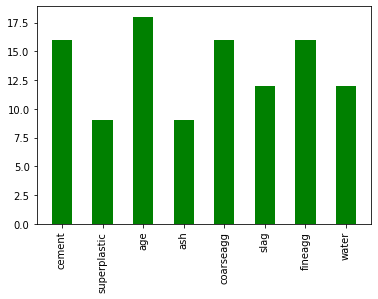

In [ ]:
#Using bargraph to visualise

df = pd.DataFrame([single_a_dict])

plt.xticks(rotation='vertical')
plt.bar(single_a_dict.keys(), single_a_dict.values(), width=0.5, color='g')




In [ ]:
df.head()

,cement,superplastic,age,ash,coarseagg,slag,fineagg,water
0,16,9,18,9,16,12,16,12


In [ ]:
data_items = single_a_dict.items()
data_list = list(data_items)

df = pd.DataFrame(data_list)

In [ ]:
df.head()

,0,1
0,cement,16
1,superplastic,9
2,age,18
3,ash,9
4,coarseagg,16


In [ ]:
df.columns=['key','value']

In [ ]:
value_cut_off_point = 10

df.loc[df['value'] <= value_cut_off_point, 'key']

1    superplastic
3             ash
Name: key, dtype: object

In [ ]:
PCA_remove_count = len(df.loc[df['value'] <= value_cut_off_point, 'key'])
print(PCA_remove_count)

2


In [ ]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [ ]:
i = 0
while i < PCA_remove_count:
  x = df.loc[df['value'] <= value_cut_off_point, 'key'].iloc[i]
  data = data.drop(columns=[x])
  i = i + 1

In [ ]:
data.head()

,cement,slag,water,coarseagg,fineagg,age,strength
0,141.3,212.0,203.5,971.8,748.5,28,29.89
1,168.9,42.2,158.3,1080.8,796.2,14,23.51
2,250.0,0.0,187.4,956.9,861.2,28,29.22
3,266.0,114.0,228.0,932.0,670.0,28,45.85
4,154.8,183.4,193.3,1047.4,696.7,28,18.29


Creating X axis with features for prediction (indipendant variables) and target y for prediction (dependant variable)

In [ ]:
data_final = data.copy()


X = pd.DataFrame(data_final, columns=data_final.columns)
X = X.drop(columns=['strength'])


y = pd.DataFrame(data.strength)

## Viewing X and y

In [ ]:
X.head()

,cement,slag,water,coarseagg,fineagg,age
0,141.3,212.0,203.5,971.8,748.5,28
1,168.9,42.2,158.3,1080.8,796.2,14
2,250.0,0.0,187.4,956.9,861.2,28
3,266.0,114.0,228.0,932.0,670.0,28
4,154.8,183.4,193.3,1047.4,696.7,28


In [ ]:
y.head()

,strength
0,29.89
1,23.51
2,29.22
3,45.85
4,18.29


## Creating test and train sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.80, 
                                                    random_state=1,
                                                    )
#Converting y_train into 1d array
y_train = y_train.values.ravel()

In [ ]:
print('X_train shape', y_train.shape, 'X_test shape', y_test.shape)

X_train shape (744,) X_test shape (186, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

#libraries for evaluation import
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

# Defining model algorithms for regression
LR_model= LinearRegression()
DTR_model = DecisionTreeRegressor(random_state=0)
RFR_model = RandomForestRegressor()
SVR_model =  SVR()
ETR_model = ExtraTreesRegressor()

#Fitting models on the training set, then predicting on the test set

#Linear Regressor
LR_model.fit(X_train, y_train)
LR_predictions = LR_model.predict(X_test)

#Decision Tree Regressor
DTR_model.fit(X_train, y_train)
DTR_predictions = DTR_model.predict(X_test)

#Random Forest Regressor
RFR_model.fit(X_train, y_train)
RFR_predictions = RFR_model.predict(X_test)

#Support Vector Regressor
SVR_model.fit(X_train, y_train)
SVR_predictions = SVR_model.predict(X_test)

#Extra Trees Regressor
ETR_model.fit(X_train, y_train)
ETR_predictions = ETR_model.predict(X_test)

#Evaluation of models

#Linear Regression
print('Linear Regression:')
#R2 score:
print('Linear regression R2 score: {}'.format(r2_score(y_test,LR_predictions)))
#Mean absolute error:
print('Linear regression Mean Absolute Error score: {}'.format(mean_absolute_error(y_test,LR_predictions)))
#Mean squared error score:
print('Linear regression Mean Squared Error score: {}'.format(mean_squared_error(y_test,LR_predictions)))
#Root mean squared error:
print('Linear regression Root Mean Error score: {}'.format(np.sqrt(mean_squared_error(y_test,LR_predictions))))
#Roor mean squared log error:
print('Linear regression Root Mean Squared Log Error score: {}\n'.format(np.sqrt(mean_squared_log_error(y_test,LR_predictions))))


#Decision Tree Regression
print('Decision Tree Regression:')
#R2 score:
print('Decision tree regression R2 score: {}'.format(r2_score(y_test,DTR_predictions)))
#Mean absolute error:
print('Decision tree regression Mean Absolute Error score: {}'.format(mean_absolute_error(y_test,DTR_predictions)))
#Mean squared error score:
print('Decision tree regression Mean Squared Error score: {}'.format(mean_squared_error(y_test,DTR_predictions)))
#Root mean squared error:
print('Decision tree regression Root Mean Error score: {}'.format(np.sqrt(mean_squared_error(y_test,DTR_predictions))))
#Roor mean squared log error:
print('Decision tree regression Root Mean Squared Log Error score: {}\n'.format(np.sqrt(mean_squared_log_error(y_test,DTR_predictions))))

#Random Forest Regression
print('Random Forest Regression:')
#R2 score:
print('Random forest regression R2 score: {}'.format(r2_score(y_test,RFR_predictions)))
#Mean absolute error:
print('Random forest regression Mean Absolute Error score: {}'.format(mean_absolute_error(y_test,RFR_predictions)))
#Mean squared error score:
print('Random forest regression Mean Squared Error score: {}'.format(mean_squared_error(y_test,RFR_predictions)))
#Root mean squared error:
print('Random forest regression Root Mean Error score: {}'.format(np.sqrt(mean_squared_error(y_test,RFR_predictions))))
#Roor mean squared log error:
print('Random forest regression Root Mean Squared Log Error score: {}\n'.format(np.sqrt(mean_squared_log_error(y_test,RFR_predictions))))

#Support Vector Regression
print('Support Vector Regression:')
#R2 score:
print('Support vector regression R2 score: {}'.format(r2_score(y_test,SVR_predictions)))
#Mean absolute error:
print('Support vector regression Mean Absolute Error score: {}'.format(mean_absolute_error(y_test,SVR_predictions)))
#Mean squared error score:
print('Support vector regression Mean Squared Error score: {}'.format(mean_squared_error(y_test,SVR_predictions)))
#Root mean squared error:
print('Support vector regression Root Mean Error score: {}'.format(np.sqrt(mean_squared_error(y_test,SVR_predictions))))
#Roor mean squared log error:
print('Support vector regression Root Mean Squared Log Error score: {}\n'.format(np.sqrt(mean_squared_log_error(y_test,SVR_predictions))))

#Extra Trees Regression
print('Extra Trees Regression:')
#R2 score:
print('Extra trees regression R2 score: {}'.format(r2_score(y_test,ETR_predictions)))
#Mean absolute error:
print('Extra trees regression Mean Absolute Error score: {}'.format(mean_absolute_error(y_test,ETR_predictions)))
#Mean squared error score:
print('Extra trees regression Mean Squared Error score: {}'.format(mean_squared_error(y_test,ETR_predictions)))
#Root mean squared error:
print('Extra trees regression Root Mean Error score: {}'.format(np.sqrt(mean_squared_error(y_test,ETR_predictions))))
#Roor mean squared log error:
print('Extra trees regression Root Mean Squared Log Error score: {}\n'.format(np.sqrt(mean_squared_log_error(y_test,ETR_predictions))))

Linear Regression:
Linear regression R2 score: 0.7529439191964501
Linear regression Mean Absolute Error score: 6.432791620698702
Linear regression Mean Squared Error score: 68.90554529027685
Linear regression Root Mean Error score: 8.300936410446525
Linear regression Root Mean Squared Log Error score: 0.2564963716307668

Decision Tree Regression:
Decision tree regression R2 score: 0.8341401885269977
Decision tree regression Mean Absolute Error score: 4.449193548387097
Decision tree regression Mean Squared Error score: 46.259378494623654
Decision tree regression Root Mean Error score: 6.80142474005437
Decision tree regression Root Mean Squared Log Error score: 0.2140041199710315

Random Forest Regression:
Random forest regression R2 score: 0.9166443976847587
Random forest regression Mean Absolute Error score: 3.594597064132103
Random forest regression Mean Squared Error score: 23.248418787547763
Random forest regression Root Mean Error score: 4.821661413615411
Random forest regression R

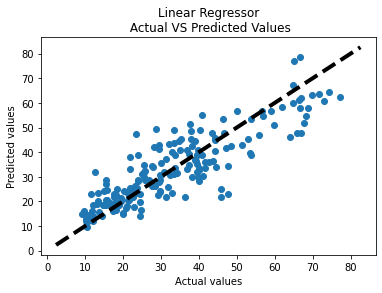

In [ ]:
#Actual vs Predicted plot for Linear Regressor
fig, ax = plt.subplots()
ax.scatter(y_test, LR_predictions)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_title('Linear Regressor\n Actual VS Predicted Values')
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
plt.show()

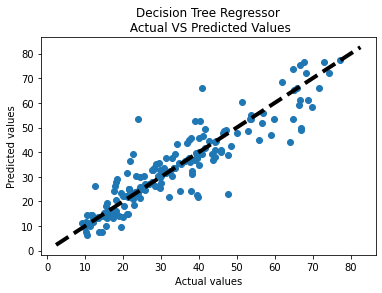

In [ ]:
#Actual vs Predicted plot for Decision Tree Regressor
fig, ax = plt.subplots()
ax.scatter(y_test, DTR_predictions)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_title('Decision Tree Regressor\n Actual VS Predicted Values')
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
plt.show()

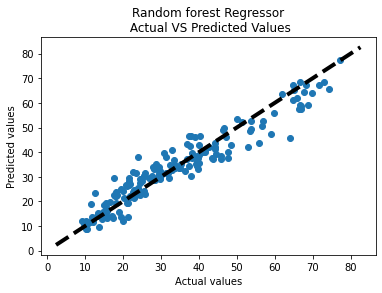

In [ ]:
#Actual vs Predicted plot for Decision Tree Regressor
fig, ax = plt.subplots()
ax.scatter(y_test, RFR_predictions)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_title('Random forest Regressor\n Actual VS Predicted Values')
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
plt.show()

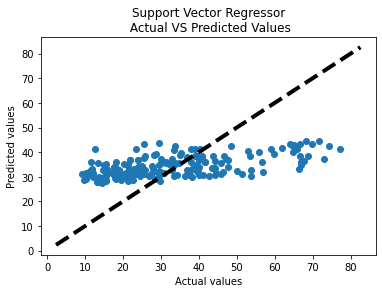

In [ ]:
#Actual vs Predicted plot for Support Vector Regressor
fig, ax = plt.subplots()
ax.scatter(y_test, SVR_predictions)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_title('Support Vector Regressor\n Actual VS Predicted Values')
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
plt.show()

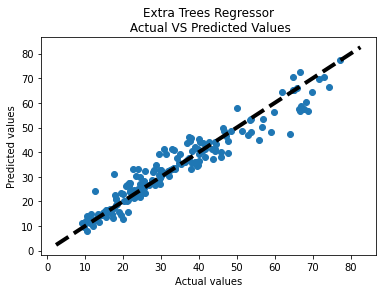

In [ ]:
#Actual vs Predicted plot for Extra Trees Regressor
fig, ax = plt.subplots()
ax.scatter(y_test, ETR_predictions)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_title('Extra Trees Regressor\n Actual VS Predicted Values')
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
plt.show()